# Data Augmentation


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab import files

Saving image01.jpg to image01 (2).jpg


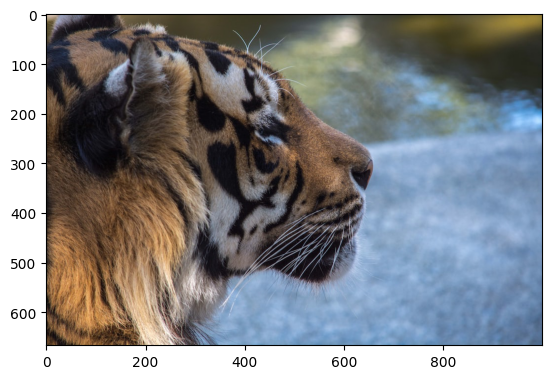

In [ ]:
path = files.upload()
path_img = list(path.keys())[0]
img = mpimg.imread(path_img)
plt.imshow(img)

(150, 150, 3)


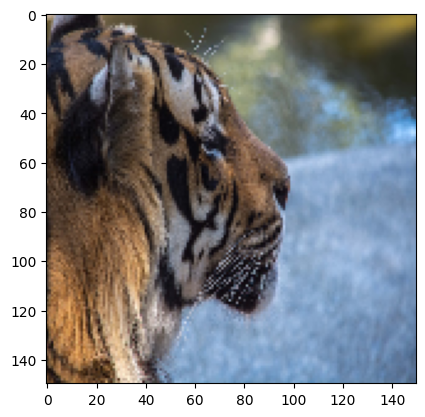

In [ ]:
#resizing and rescalign the images

resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(150,150),
    layers.experimental.preprocessing.Rescaling(1./255),
])

resized_image = resize_rescale(img)
plt.imshow(resized_image)
print(resized_image.shape)

In [ ]:
#expanding the dimentions of the image
expanded_image = tf.expand_dims(img,0)
print(expanded_image)
#plt.imshow(expanded_image)

tf.Tensor(
[[[[225 203 189]
   [225 203 189]
   [226 204 190]
   ...
   [135 115  52]
   [134 114  51]
   [133 113  52]]

  [[222 200 186]
   [222 200 186]
   [222 200 186]
   ...
   [137 117  54]
   [136 116  53]
   [135 115  54]]

  [[215 194 177]
   [215 194 177]
   [215 194 177]
   ...
   [139 119  56]
   [138 118  55]
   [137 117  54]]

  ...

  [[ 60  43  15]
   [ 84  63  36]
   [108  84  58]
   ...
   [ 80 109 143]
   [ 81 110 144]
   [ 82 111 145]]

  [[ 58  41  13]
   [ 84  64  37]
   [106  82  58]
   ...
   [ 82 111 145]
   [ 83 112 146]
   [ 83 112 146]]

  [[ 58  43  14]
   [ 87  70  44]
   [104  82  59]
   ...
   [ 83 111 148]
   [ 84 112 149]
   [ 85 113 150]]]], shape=(1, 667, 1000, 3), dtype=uint8)


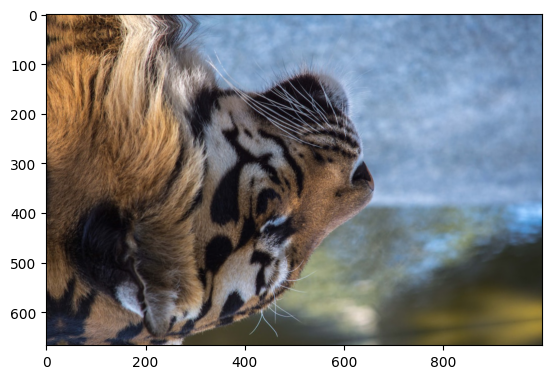

In [ ]:
#rotation and random flip

rotation_randomflip = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
  ])

rotated_randomflip_image = rotation_randomflip(img)
plt.imshow(rotated_randomflip_image.numpy().astype('uint8'))

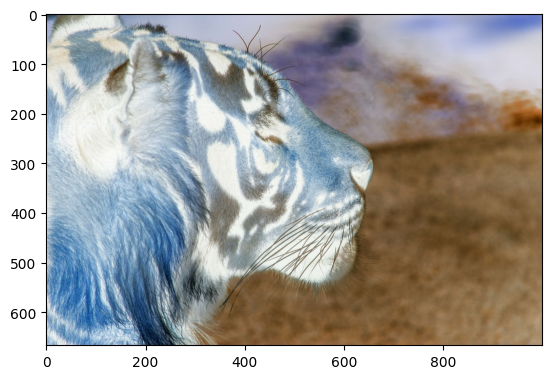

In [ ]:
#random invert data
def random_image_invert(x,p=0.0):
  if tf.random.uniform([]) > p:
    x = (255-x)
  else:
    x
  return x

def random_invert(p=0.0):
  return layers.Lambda(lambda x: random_image_invert(x,p))

random_invert = random_invert()

inverted_image = random_invert(img)
plt.imshow(inverted_image)

In [ ]:
def function(a=2):
  return lambda x : x+20

c = function()
print(c(1))

21


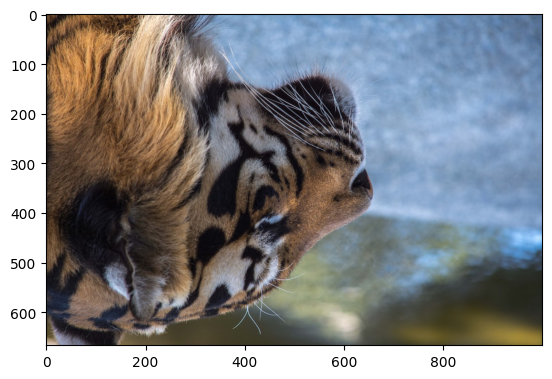

In [ ]:
#flip an image

flipped_image = tf.image.flip_up_down(img)
plt.imshow(flipped_image)

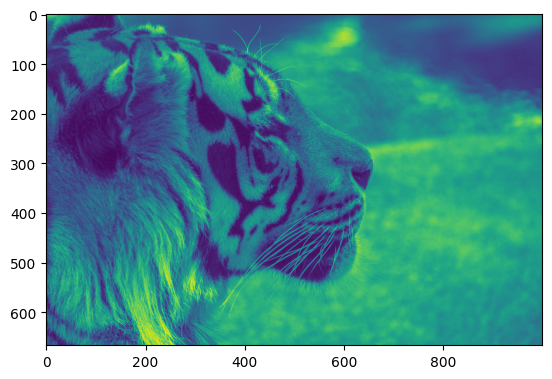

In [ ]:
grayscaled_image = tf.image.rgb_to_grayscale(img)
plt.imshow(grayscaled_image)

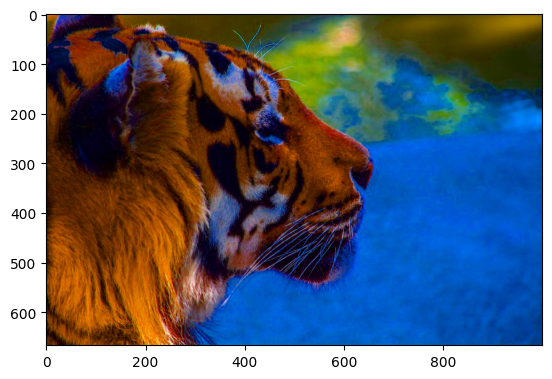

In [ ]:
saturated_image = tf.image.adjust_saturation(img,5)
plt.imshow(saturated_image)

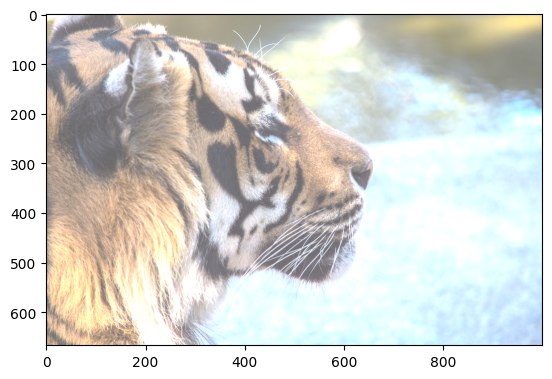

In [ ]:
bright_image = tf.image.adjust_brightness(img,0.4)
plt.imshow(bright_image)

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
print(img.shape)
img = img.reshape((1,) + img.shape)
print(img.shape)

(667, 1000, 3)
(1, 667, 1000, 3)


In [ ]:
# i = 0
# for batch in datagen.flow(img, batch_size=1):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

batch = datagen.flow(img,batch_size=1)
print(batch)

In [ ]:
i = 0
for batch in datagen.flow(img, batch_size=1,
                          save_to_dir='/content/previe', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [ ]:
import numpy as np

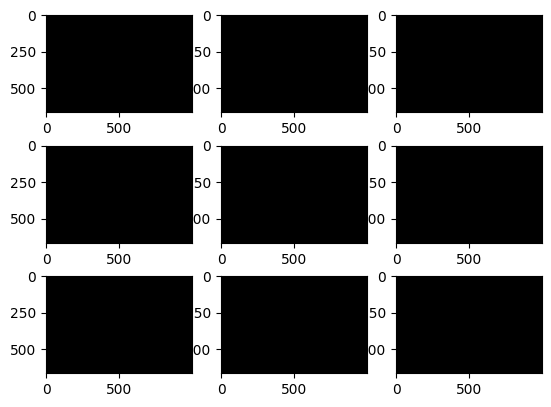

In [ ]:
for i in range(9):

    # define subplot
    plt.subplot(330 + 1 + i)

    # generate batch of images
    ite = batch.next()

    # convert to unsigned integers for viewing
    image = ite[0].astype('uint8')

    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.show()

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

(667, 1000, 3)


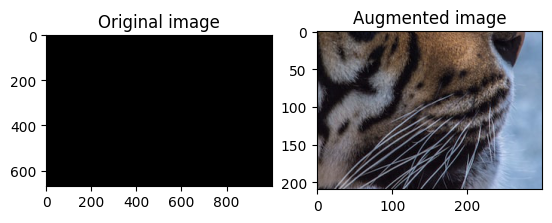

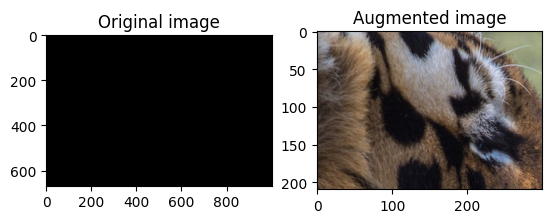

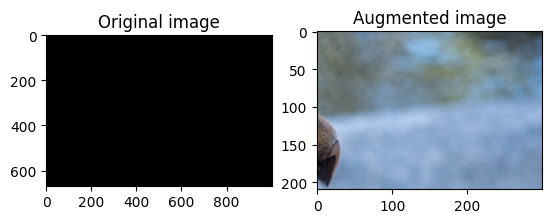

In [ ]:
print(img.shape)
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(
      img, size=[210, 300, 3], seed=seed)
  visualize(image, stateless_random_crop)

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
train_dataset,info = tfds.load('horses_or_humans',with_info=True,split='train', as_supervised=True)
val_dataset,info = tfds.load('horses_or_humans',with_info=True,split='test', as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteKN7ZKW/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteKN7ZKW/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [ ]:
image_name = info.features["label"].int2str

In [ ]:
image,label = next(iter(train_dataset))

Text(0.5, 1.0, 'horses')

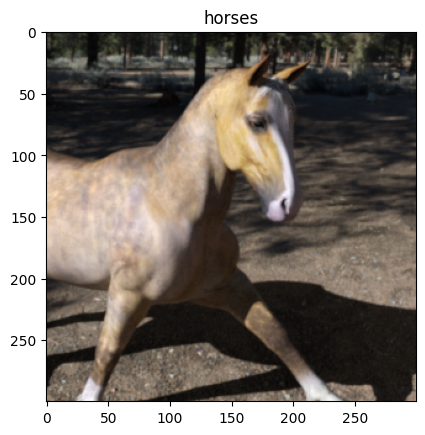

In [ ]:
plt.imshow(image)
plt.title(image_name(label))

In [ ]:
#resizing and rescaling neural network

from tensorflow.keras import layers

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(150,150),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [ ]:
result = resize_and_rescale(image)

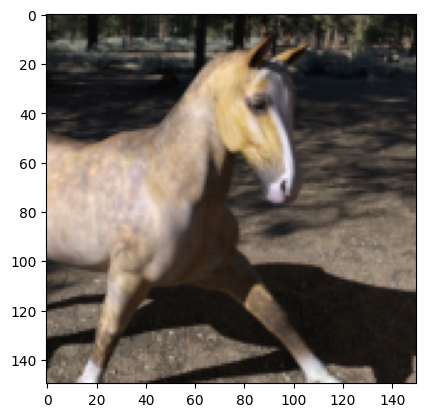

In [ ]:
plt.imshow(result)

In [ ]:
result.shape

TensorShape([150, 150, 3])

In [ ]:
rotation_randomflip = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),])

In [ ]:
image.shape

TensorShape([300, 300, 3])

In [ ]:
image = tf.expand_dims(image,0)
print(image)

tf.Tensor(
[[[[ 53  55  45]
   [ 46  47  40]
   [ 39  40  36]
   ...
   [ 24  25  24]
   [ 21  23  21]
   [ 19  21  20]]

  [[ 41  40  34]
   [ 49  48  42]
   [ 54  53  48]
   ...
   [ 18  20  19]
   [ 16  18  16]
   [ 16  18  16]]

  [[ 33  29  28]
   [ 50  47  42]
   [ 62  58  53]
   ...
   [ 17  19  17]
   [ 15  16  14]
   [ 14  15  13]]

  ...

  [[160 143 125]
   [162 147 129]
   [142 128 109]
   ...
   [144 124 106]
   [141 121 104]
   [161 141 122]]

  [[142 125 107]
   [155 134 115]
   [153 132 113]
   ...
   [149 129 113]
   [156 134 115]
   [163 142 123]]

  [[120 101  85]
   [123 103  87]
   [119 101  84]
   ...
   [158 136 118]
   [163 139 120]
   [170 149 129]]]], shape=(1, 300, 300, 3), dtype=uint8)


In [ ]:
image.dtype

tf.uint8

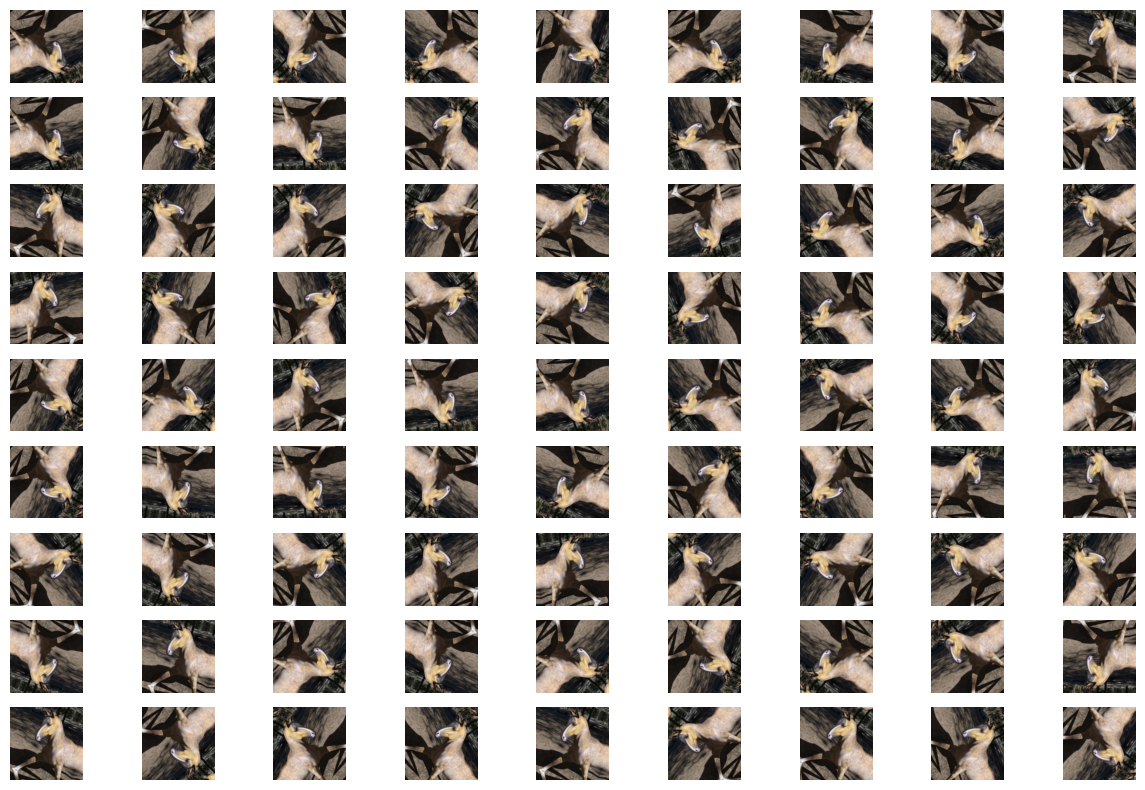

In [ ]:
plt.figure(figsize=(15,10))
for i in range(81):
  augmented_iamge = rotation_randomflip(image)
  ax = plt.subplot(9,9,i+1)
  plt.imshow(augmented_iamge[0].numpy().astype('uint8'))
  #plt.imshow(augmented_iamge[0].numpy().astype('uint8'))
  plt.axis('off')

Saving African_buffalo_(Syncerus_caffer_caffer)_male_with_cattle_egret.jpg to African_buffalo_(Syncerus_caffer_caffer)_male_with_cattle_egret (13).jpg
African_buffalo_(Syncerus_caffer_caffer)_male_with_cattle_egret.jpg


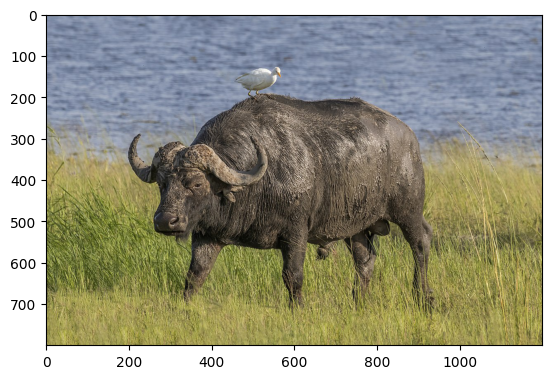

In [ ]:
import matplotlib.image as mpimg
from google.colab import files

path = files.upload()
print(path_image := list(path.keys())[0])
img = mpimg.imread(path_image)
plt.imshow(img)